<a href="https://colab.research.google.com/github/emilyperras/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment%201/Econ_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: The Cost of Living Crisis
The Mission: The official Consumer Price Index (CPI) says inflation is cooling. But your bank account says otherwise. Why? Because the "average" consumer doesn't exist. In this assignment, you will transition from a consumer of statistics to a producer of metrics.

Step 1.1: Construct the "Student Basket"

In [1]:


# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Laptop', 'Price_2016': 1200, 'Price_2024': 1700}
]


Step 1.2: Compute Inflation (Loops & Functions)


In [2]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Laptop: 41.67% Inflation


# Phase 2: Process (The API Pipeline)

Step 2.1: The "Data Proxy" Strategy


In [3]:
!pip install fredapi
from fredapi.fred import Fred
fred = Fred('2b514bc17eb3522b7a3a940646ca82bb')
import pandas as pd
import numpy as np

df = pd.DataFrame(student_basket)

#Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
cable_streaming = fred.get_series('CUSR0000SERA02')
dining_out = fred.get_series('CUSR0000SEFV')

Connect the Series

In [4]:
calculated_cpi = pd.DataFrame({
    "Official_CPI": official_cpi,
    "Tuition": tuition,
    "Rent": rent,
    "Cable_Streaming": cable_streaming,
    "Dining_Out": dining_out
})
calculated_cpi.head()

,Official_CPI,Tuition,Rent,Cable_Streaming,Dining_Out
1947-01-01,21.48,NaN,NaN,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,NaN,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN


Step 2.2: Normalization Logic (CRITICAL)

In [5]:
cpi_2016 = calculated_cpi[calculated_cpi.index.year >= 2016].copy()
cpi_2016.head()

def calculate_value_index(current_value, value_at_start_date):
  return (current_value / value_at_start_date) * 100

cpi_2016_indexed = pd.DataFrame(index=cpi_2016.index)

for column in cpi_2016.columns:
    base = cpi_2016[column].iloc[0]
    indexed_values = []
    for value in cpi_2016[column]:
      indexed_values.append(calculate_value_index(value, base))
    cpi_2016_indexed[column] = indexed_values

cpi_2016_indexed.head()

,Official_CPI,Tuition,Rent,Cable_Streaming,Dining_Out
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978


#Phase 3: Analyze (The Index Theory & Visualization)


Step 3.1: Visualizing Raw Components


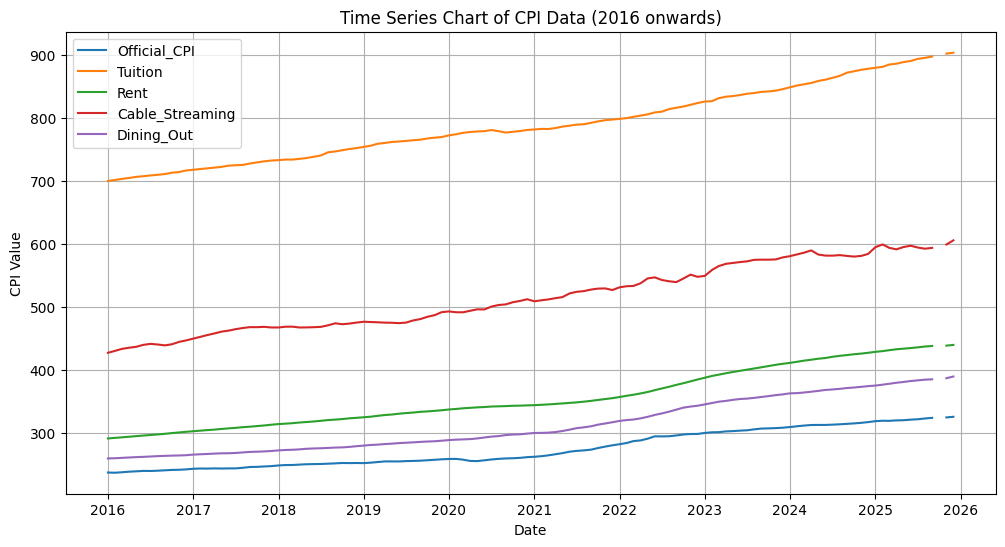

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for column in cpi_2016.columns:
    plt.plot(cpi_2016.index, cpi_2016[column], label=column)

plt.title('Time Series Chart of CPI Data (2016 onwards)')
plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.legend()
plt.grid(True)
plt.show()

Step 3.2: The Weighted "Student SPI" (Honest Chart)

In [7]:
# Student Basket Weights
student_basket_weights = {
    'Tuition' : [.6],
    'Rent' : [.225],
    'Cable_Streaming' : [.05],
    'Dining_Out' : [.125]
}

# Student Pricing Index (SPI)
cpi_2016_indexed["Student_SPI"] = 0.0

for i in range(len(cpi_2016_indexed)):
  yearly_total = 0.0
  current_date = cpi_2016_indexed.index[i]

  for item_name, weights_list in student_basket_weights.items():
    weight = weights_list[0]

    # Retrieve the indexed value for the current item and date
    if item_name in cpi_2016_indexed.columns:
        value_today = cpi_2016_indexed.loc[current_date, item_name]
        yearly_total += value_today * weight

  cpi_2016_indexed.loc[current_date, "Student_SPI"] = yearly_total

cpi_2016_indexed.head()

,Official_CPI,Tuition,Rent,Cable_Streaming,Dining_Out,Student_SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869,100.269230
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827,100.535764
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712,100.792215
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978,101.053538


Task 3: Plot: Your Custom Student_SPI vs. Official CPI. Use plt.fill_between to highlight the "Inflation Gap."

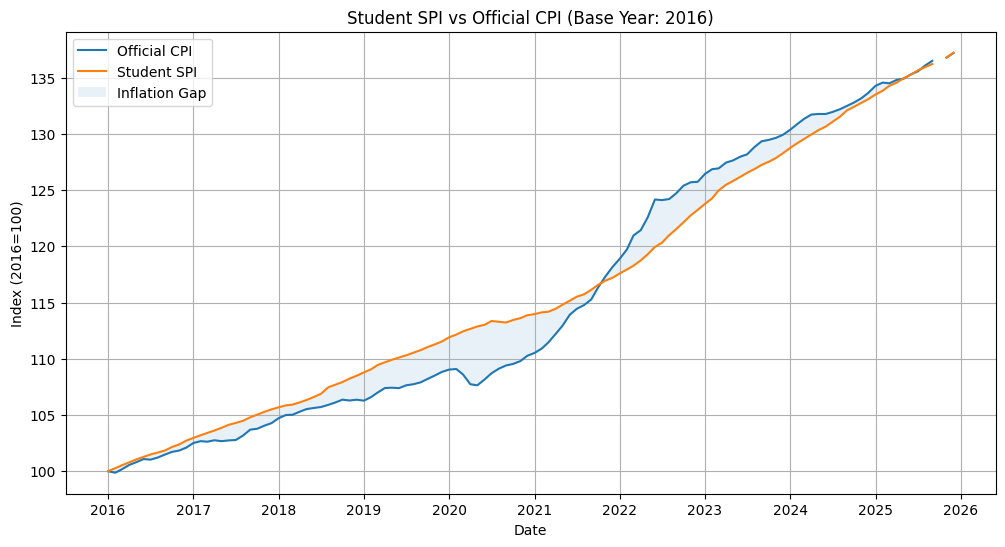

In [8]:
plt.figure(figsize=(12,6))

# Two Lines
plt.plot(cpi_2016_indexed.index, cpi_2016_indexed["Official_CPI"], label="Official CPI")
plt.plot(cpi_2016_indexed.index, cpi_2016_indexed["Student_SPI"], label="Student SPI")

# Add Gap
plt.fill_between(
    cpi_2016_indexed.index,
    cpi_2016_indexed["Official_CPI"],
    cpi_2016_indexed["Student_SPI"],
    alpha=0.1,
    label="Inflation Gap"
)

plt.title("Student SPI vs Official CPI (Base Year: 2016)")
plt.xlabel("Date")
plt.ylabel("Index (2016=100)")
plt.legend()
plt.grid(True)
plt.show()

Step 3.3: The Scale Fallacy (Why We Normalize)
These CPI series, without cleaning have different base years


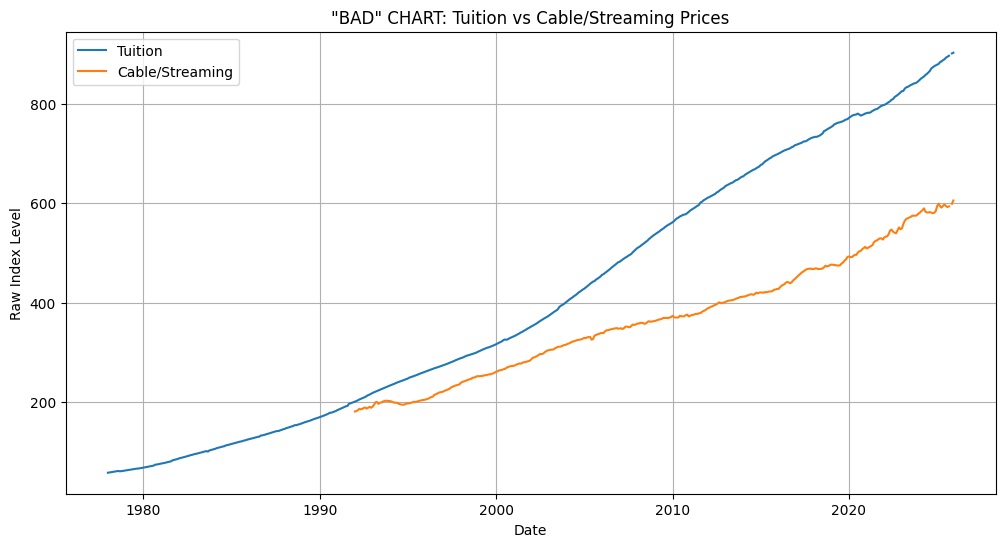

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(calculated_cpi.index, calculated_cpi["Tuition"], label="Tuition")
plt.plot(calculated_cpi.index, calculated_cpi["Cable_Streaming"], label="Cable/Streaming")

plt.title('"BAD" CHART: Tuition vs Cable/Streaming Prices')
plt.xlabel("Date")
plt.ylabel("Raw Index Level")
plt.legend()
plt.grid(True)
plt.show()

Comparing these CPI indices is a data "crime" because the series have different base years. This is the main reason why we set a base year of 2016 for our Student SPI analysis. The index levels for this chart is not scaled the same making the tuition seem more inflated than it truly is compared to Cable/Streaming.

#Phase 4: AI Expansion (The Co-Pilot Era)

Task 4.1: The Ultimate Reality Check (Boston vs. USA vs. You)

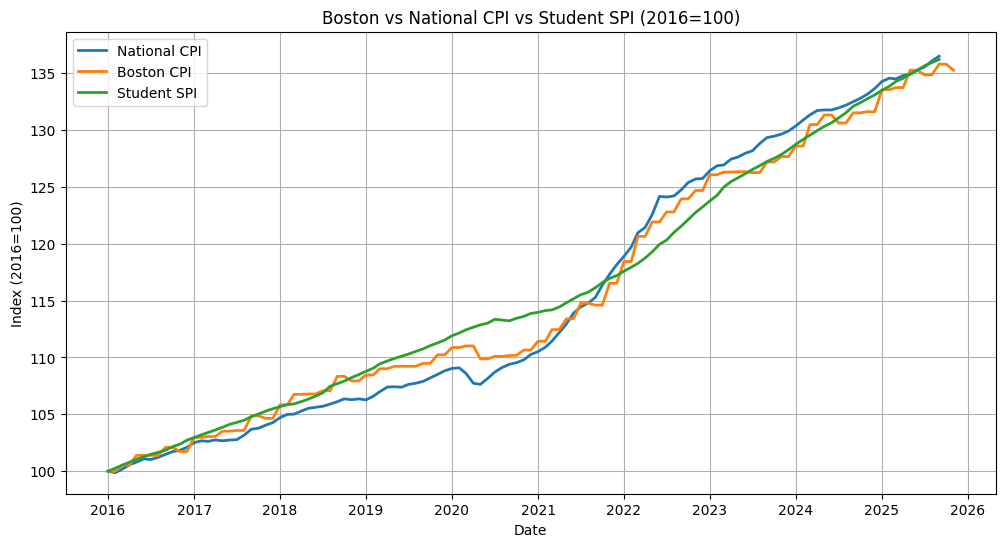

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch Boston CPI from FRED
boston_cpi = fred.get_series("CUURA103SA0")

# 2) Put it into a DataFrame
boston_df = pd.DataFrame({"Boston_CPI_raw": boston_cpi})
boston_df.index = pd.to_datetime(boston_df.index)

# 3) Resample to monthly start + fill missing values
# (some metro series have missing months)
boston_df = boston_df.resample("MS").asfreq()
boston_df["Boston_CPI_raw"] = boston_df["Boston_CPI_raw"].ffill()

# 4) Keep 2016 onward
boston_df = boston_df[boston_df.index >= "2016-01-01"].copy()

# 5) Normalize Boston so 2016-01 = 100
boston_base = boston_df["Boston_CPI_raw"].iloc[0]
boston_df["Boston_CPI"] = (boston_df["Boston_CPI_raw"] / boston_base) * 100

# 6) Merge into your existing normalized DataFrame
df_plot = cpi_2016_indexed[["Official_CPI", "Student_SPI"]].join(
    boston_df["Boston_CPI"],
    how="inner"
)

# 7) Plot National vs Boston vs Student SPI
plt.figure(figsize=(12, 6))

plt.plot(df_plot.index, df_plot["Official_CPI"], label="National CPI", linewidth=2)
plt.plot(df_plot.index, df_plot["Boston_CPI"], label="Boston CPI", linewidth=2)
plt.plot(df_plot.index, df_plot["Student_SPI"], label="Student SPI", linewidth=2)

plt.title("Boston vs National CPI vs Student SPI (2016=100)")
plt.xlabel("Date")
plt.ylabel("Index (2016=100)")
plt.legend()
plt.grid(True)
plt.show()
